This is gona be small pytoch project
The goal is two thing lear clasification in pytoch
generate images in pytorch.

For both of these case i a gona use the EMIST dataset.
wich is a opendataset with hanwritten letter convert to images.

I like this for two reason one. the problem is simple, second the data size is large but the images size is not wich make it esay to work with. 

Secondly the problem is also simple.

I am thinking about making a small app 



[i am following this](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

In [24]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),  # Converts PIL Image to PyTorch tensor
      transforms.Lambda(lambda x: (x > 0).float())
])
# Download the EMNIST dataset with the 'letters' split (handwritten letters)
train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=True,transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='byclass', train=False, download=True,transform=transform)


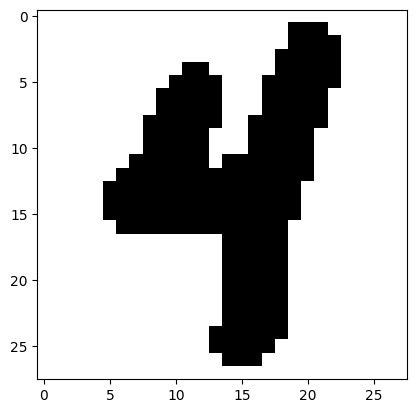

label
4
asigned letter


4

In [25]:
import matplotlib.pyplot as plt
import numpy as np
#labels
#train_dataset.classes
#data
#train_dataset.target

# it seam like each row is array so each train_dataset.data[0] call the first picture train_dataset.data[0][0] is the first row
index=100
image,label =train_dataset[index]
letter_ind=label
image = np.transpose(image)  # Swap rows and columns


fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()
print("label")
print (train_dataset.classes[letter_ind])
print("asigned letter")
letter_ind

In [26]:
import torch
train_dataset[0][0].unique()
#torch.unique()

tensor([0., 1.])

# Clasification
In this section i am going clasification.
for images Convolutional Neural Networks can be used.


So the input is gona be one for each input variebl so 28*28=784
output is gona be the numer label wich i 10 + the number letters wich 62

One of the frustationg thing about neual network is how to chose the number of hiden lays and the number neurons.
Their is discussion here.

[discussion](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

they sai les lair and the average of neuron. but i can alo find discusion that say more layers is better than deep layser.
To a exten this makes sens since each layer give a lot combination/interaction, wich is what some this come from but on the other hand i can lead to overfitting.

So the ansers in porberli somewhere in between.
Which is 




In [27]:
# make nueal network.
import os
import torch

from torchvision import datasets, transforms
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")



Using cpu device


In [28]:
# Define parameter in the 
input_size=28*28
output_size=len(train_dataset.classes)


In [29]:
import torch.nn as nn


class NeuralNetwork(nn.Module):
    def __init__(self): # start class
        super().__init__() # call parent init, so nn.Module
        self.flatten = nn.Flatten() # make the input in to a list
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, output_size)  # Output layer with 62 classes
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits



In [30]:
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # This should check if cuda is avaibel ore use cpu
model = NeuralNetwork().to(device)
print(model)
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=1024, out_features=512, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=512, out_features=256, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=256, out_features=128, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Linear(in_features=128, out_features=62, bias=True)
  )
)


In [31]:
loss_fn = nn.CrossEntropyLoss() # define the los functuin
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) #define the optimiser in this case its

In [32]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [33]:
# make traning function

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset) # the data loader, wich define the bath sizes
    model.train() # set model to traning mode 
    for batch, (X, y) in enumerate(dataloader): # each bach consist of x and y 
        X, y = X.to(device), y.to(device) 

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # this is bit weird it i need to set gradient to zero otherwise it addiativ, This could be if i wanted to use momentum.

        if batch % 100 == 0: #print loss every 100 bathes
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [34]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset) 
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 4.202431  [   64/697932]
loss: 4.057902  [ 6464/697932]
loss: 4.103806  [12864/697932]
loss: 4.065298  [19264/697932]
loss: 3.972025  [25664/697932]
loss: 3.730175  [32064/697932]
loss: 3.744399  [38464/697932]
loss: 3.593198  [44864/697932]
loss: 3.631562  [51264/697932]


In [29]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")


Saved PyTorch Model State to model.pth


In [30]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

Here i want to make the app.

The idear is to make app that lets me draw a picture from the touch pad.
and tries to regenize the the letter 

In [31]:
model_path = "model.pth"

if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    print("Model loaded successfully.")
else:
    print(f"File {model_path} not found.")

Model loaded successfully.
